# Analysing Food-insecurity Problem in Karamoja Region of Uganda

## Introduction

Karamoja is a sub-region in Uganda. This sub-region is considered to be the most food-insecure region in Uganda. One of the main reasons is the low productivity level of the crops due to intense droughts as well as pest and disease outbreaks.
[click here to get more about Karamoja](https://en.wikipedia.org/wiki/Karamoja)


## 1. Business Understanding

In Karamoja, several NGOs provide technical support as well as farm inputs to the farmers experiencing extremely low yield. Though, they lack visibility into the overall state of the region and often need to rely on some very local sources of information to prioritize their activities.

Dalberg Data Insights (DDI) has been requested to develop a new food security monitoring tool to support the decision making of one of those NGOs active in Karamoja.
To do so, Dalberg Data Insights developed a methodology to remotely measure the yield of the two main staple crops of the region (i.e. sorghum and maize) based on satellite images.To analyse the model the 2017 crop season is used.


### Research Questions
- How does the Population Correlate with the Total Productivity of the crops?
- What are the top 5 Subcounty with the least productivity?
- Does increase in crop area lead to increase in total Productivity?
- What is the crop with the most yields?
- What is the district with the most and least productivity?

### Objectives

- To find out how Population Correlates with the Total Productivity of the crops
- To find out the top 5 Subcounties with the least productivity
- To find out if increase in crop area leads to increase in total Productivity
- To find out the crop with the most yield
- To find out the district with the most and least productivity

## 2. Data Understanding

For this research we collect the data for the 2017 crop season for the subcounty and the district in Karamoja.

Each record (row) in this dataset represents information of each sub-county or district.
Each column represents the information of Yield and Population per Subcounty and Yield and Population per District as given below -:

- POP: total population for the subcounty
- S_Yield_Ha: average yield for sorghum for the subcounty (Kg/Ha)
- M_Yield_Ha: average yield for maize for the subcounty (Kg/Ha)
- Crop_Area_Ha: total crop area for the subcounty (Ha)
- S_Area_Ha: total sorghum crop area for the subcounty (Ha)
- M_Area_Ha: total maize crop area for the subcounty (Ha)
- S_Prod_Tot: total productivity for the sorghum for the subcounty (Kg)
- M_Prod_Tot: total productivity for the maize for the subcounty (Kg)


###  Load the Dataset with Pandas

Import the following -:

- pandas with the standard alias pd
- numpy with the standard alias np
- seaborn with the standard alias sns
- matplotlib.pyplot with the standard alias plt
- set %matplotlib inline so the graphs will display immediately below the cell that creates them.

In [10]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Exploration
load the datasets

In [11]:
# Load the Subcounty datasets from the data folder
# Specify index_col=0 to use object id as the index

df = pd.read_csv("Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv", index_col=0)

The following code checks that the data was loaded correctly

In [12]:
# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 52

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 12

### Preview the first five rows

In [13]:
# use .head() to preview the first five rows 
df.head()

,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,,,,,,,,,,,,
263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [14]:
# this code gives the description of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 263 to 1320
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUBCOUNTY_NAME  52 non-null     object 
 1   DISTRICT_NAME   52 non-null     object 
 2   POP             52 non-null     int64  
 3   Area            52 non-null     int64  
 4   Karamoja        52 non-null     object 
 5   S_Yield_Ha      52 non-null     float64
 6   M_Yield_Ha      52 non-null     float64
 7   Crop_Area_Ha    52 non-null     float64
 8   S_Area_Ha       52 non-null     float64
 9   M_Area_Ha       52 non-null     float64
 10  S_Prod_Tot      52 non-null     float64
 11  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [ ]:
"""
from the code above we get that
- the class is Pandas dataframe
- the number of columns are 12
- the number of entries(rows) 52 from index 263 to 1320 
But we will clean the index in this notebook to make it more clear and understandable
- there are 3 datatypes - float
                        - int
                        - object(string)

"""

### Explore the distributions

Plot a histogram for the distribution of Population. 
Show a black vertical line indicating the mean of the population.

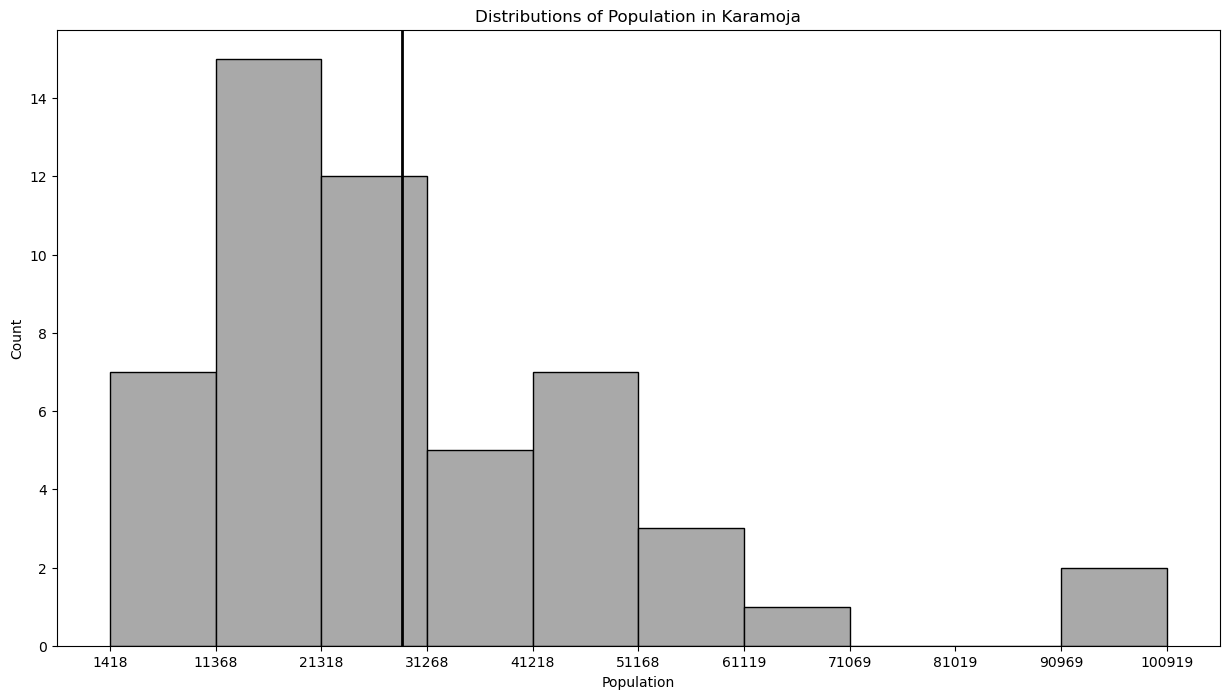

In [15]:
# Plot the distribution of the Population
import numpy as np

ax =df['POP'].plot(kind = 'hist', figsize = (15,8), color= 'darkgrey', edgecolor='black')

# Set the x_ticks to start at the min value of the Population and stop at the max value of the Population
xticks = np.linspace(start = df['POP'].min(), stop = df['POP'].max(), num = 11)
ax.set_xticks(xticks)

#Set the Title , xlabel, and ylabel
ax.set_title("Distributions of Population in Karamoja")
ax.set_xlabel("Population")
ax.set_ylabel("Count")

# Set a black vertical line indicating the mean 
mu = df['POP'].mean()
ax.axvline(mu, color = 'black', linewidth=2);


In [8]:
# Print the mean of the Population
print(" The mean is ", df['POP'].mean())

 The mean is  28934.69230769231


In [ ]:
"""
From the graph it is clear that Karamoja has a high population.
Most sub counties population ranges from 11368 and 21318 value.
The black line shows the position of the mean which is 28934.69230769231


"""

## 3. Data Preparation

In [16]:
# Preview the dataframe using .head() to get the first five rows
df.head()

,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,,,,,,,,,,,,
263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


When we check the index of the dataframe the index values are not consecutive. The ``OBJECTID`` values should start from 1, 2, 3,..52 that is the number of rows(records) we have.

We will enhance the ``OBJECTID`` for us to have consecutive values.

In [17]:
# Change the OBJECTID column and the values to begin with 1,2,3..
# reset the index
df = df.reset_index()

# this code drops the OBJECTID column
df= df.drop(columns = 'OBJECTID')

In [18]:
# this code changes the new index name to OBJECTID
df.index.name = 'OBJECTID'

#print the first five rows
df.head()

,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,,,,,,,,,,,,
0,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


When we take a look at the `S_Prod_Tot` column the values are huge hence represented as shown `2.279092e+06`, `4.582294e+06`. 
For data clarity we round of the column to two decimal places .

In [19]:
df['S_Prod_Tot'] = round(df['S_Prod_Tot'], 2)
df['S_Prod_Tot'].head()

OBJECTID
0    2279091.78
1    4582294.49
2     561476.49
3    1915695.93
4    3779939.22
Name: S_Prod_Tot, dtype: float64

In [20]:
# Preview the dataframe to see if the values have changed
df.head()

,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,,,,,,,,,,,,
0,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2279091.78,600723.892900
1,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4582294.49,959201.382500
2,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,561476.49,9991.488268
3,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1915695.93,38971.659080
4,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3779939.22,221609.511400


Next we will check the data for the following -:
- Check if the Datatypes(Dtypes) of the columns are correct
- Check if there are missing values

In [21]:
# this code gives a description of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUBCOUNTY_NAME  52 non-null     object 
 1   DISTRICT_NAME   52 non-null     object 
 2   POP             52 non-null     int64  
 3   Area            52 non-null     int64  
 4   Karamoja        52 non-null     object 
 5   S_Yield_Ha      52 non-null     float64
 6   M_Yield_Ha      52 non-null     float64
 7   Crop_Area_Ha    52 non-null     float64
 8   S_Area_Ha       52 non-null     float64
 9   M_Area_Ha       52 non-null     float64
 10  S_Prod_Tot      52 non-null     float64
 11  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.0+ KB


In [ ]:
"""
From the df.info() we now have 52 entries with index 0 -51

"""

In [22]:
# this code checks for missing values
df.isna().sum()

SUBCOUNTY_NAME    0
DISTRICT_NAME     0
POP               0
Area              0
Karamoja          0
S_Yield_Ha        0
M_Yield_Ha        0
Crop_Area_Ha      0
S_Area_Ha         0
M_Area_Ha         0
S_Prod_Tot        0
M_Prod_Tot        0
dtype: int64

Save the cleaned dataframe 

In [26]:
# import os and then create a new variable and declare the dataframe
import os
df_cleaned = df

# create the folder name and the file name
folder_name = "data"
file_name = "new_Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv"

# create a path to place the folder
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# save the cleaned dataframe to a filepath    
file_path = os.path.join(folder_name, file_name)
df_cleaned.to_csv(file_path, index = False)

## Uganda_Karamoja_District_Crop_Yield_Population
Remember the second data set that contains information of the Karamoja district?
We are going to load it and use it also to do our Analysis.

Next load the Uganda_Karamoja_District_Crop_Yield_Population

In [18]:
# Load the district dataset
# Preview it
df1 = pd.read_csv("Uganda_Karamoja_District_Crop_Yield_Population.csv", index_col= 0)
df1

,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,,,,,,,,,,
92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468
54,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
80,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


In [19]:
# Change the OBJECTID column and the values to begin with 1,2,3..
# reset the index
df1 = df1.reset_index()

# this code drops the OBJECTID column
df1= df1.drop(columns = 'OBJECTID')

In [20]:
# this code changes the new index name to OBJECTID
df1.index.name = 'OBJECTID'

#preview the dataframe
df1

,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,,,,,,,,,,
0,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468
5,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
6,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


Since there are no missing values, we checked the `OBJECTID` now we dive in to Data analysis and Visualisation

## 4. Data Visualization and Analysis

### To find out how Population Correlates with the Total productivity of the crops
To do this we use the Population column and Total Productivity column for the two crops and we are using the Subcounty dataframe.
To know the correlation we are going to plot two subplots of the Maize and Sorghum correlation with the population

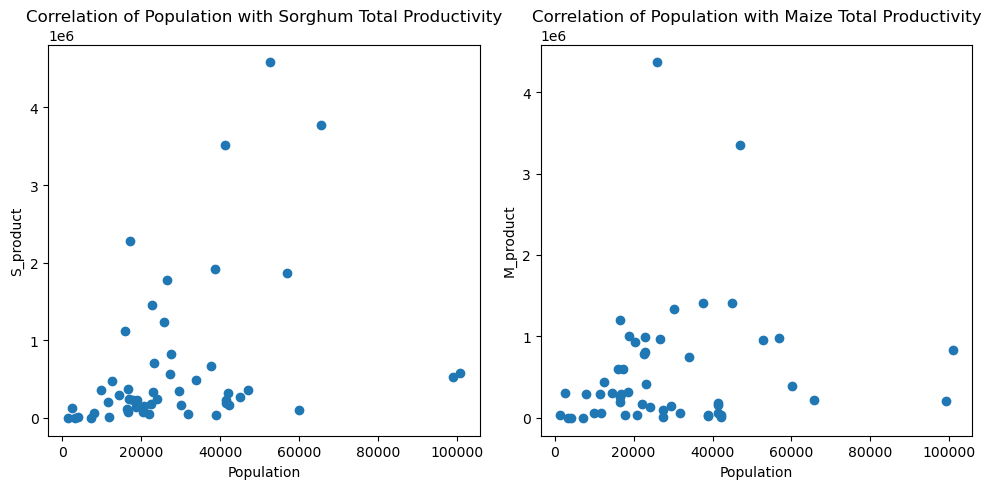

In [21]:
# create two subplots using ncols=2
# Plot the two scatter plots of the maize/sorghum correlation with the population
# set the title, x_labels and y_lables
fig, (ax1,ax2) = plt.subplots(figsize= (10,5), ncols=2)
ax1.scatter(df['POP'],df['S_Prod_Tot'])
ax1.set_title("Correlation of Population with Sorghum Total Productivity")
ax1.set_xlabel("Population")
ax1.set_ylabel("S_product")


ax2.scatter(df['POP'], df['M_Prod_Tot'])
ax2.set_title("Correlation of Population with Maize Total Productivity")
ax2.set_xlabel("Population")
ax2.set_ylabel("M_product")

plt.tight_layout();

In [ ]:
"""
In the above subplots it is clear that the there is a positive correlation in both the scatter plot.
This is shown by the increament of the points from left to right
This means that the increase in Population and the increase in Productivity in the Staple Crops are associated

"""

### To find out the top 5 Subcounties with the least productivity

To find out the top 5 Subcounties with the least productivity we follow the following steps -:
- Create another column with the sum of the Sorghum total product and the Maize Total Product
- Plot a bar graph of the Subcounty name against the total productivity column
- Create another dataframe with only two columns and assign it to a variable name `subcounty_by_productivity`
- Sort the new dataframe by values of the total productivity column
- Then get the top 5 least productive subcounty and plot a bar graph

In [8]:
# Create a new column
# Use list comprehensions to fill the column with the sum of the crops productivity
df['Total_Prod'] = [x+y for x,y in zip(df['S_Prod_Tot'], df['M_Prod_Tot'])]

In [9]:
# Preview the first five rows and confirm the new column
df

,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Prod
OBJECTID,,,,,,,,,,,,,
0,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2279091.78,6.007239e+05,2.879816e+06
1,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4582294.49,9.592014e+05,5.541496e+06
2,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,561476.49,9.991488e+03,5.714680e+05
3,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1915695.93,3.897166e+04,1.954668e+06
4,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3779939.22,2.216095e+05,4.001549e+06
5,RENGEN,KOTIDO,41273,652744859,Y,271.185843,1047.180128,13278.520430,12964.499730,171.585704,3515788.79,1.796811e+05,3.695470e+06
6,KAABONG EAST,KAABONG,42221,60801942,Y,160.588525,650.123565,1021.316990,1004.647534,15.660409,161334.87,1.018120e+04,1.715161e+05
7,KAABONG TOWN COUNCIL,KAABONG,38857,13071455,Y,212.210703,1229.213444,175.080527,156.503888,18.526186,33211.80,2.277264e+04,5.598444e+04
8,KAABONG WEST,KAABONG,41454,67612362,Y,208.040518,1056.416068,967.336727,910.254122,56.275355,189369.74,5.945019e+04,2.488199e+05


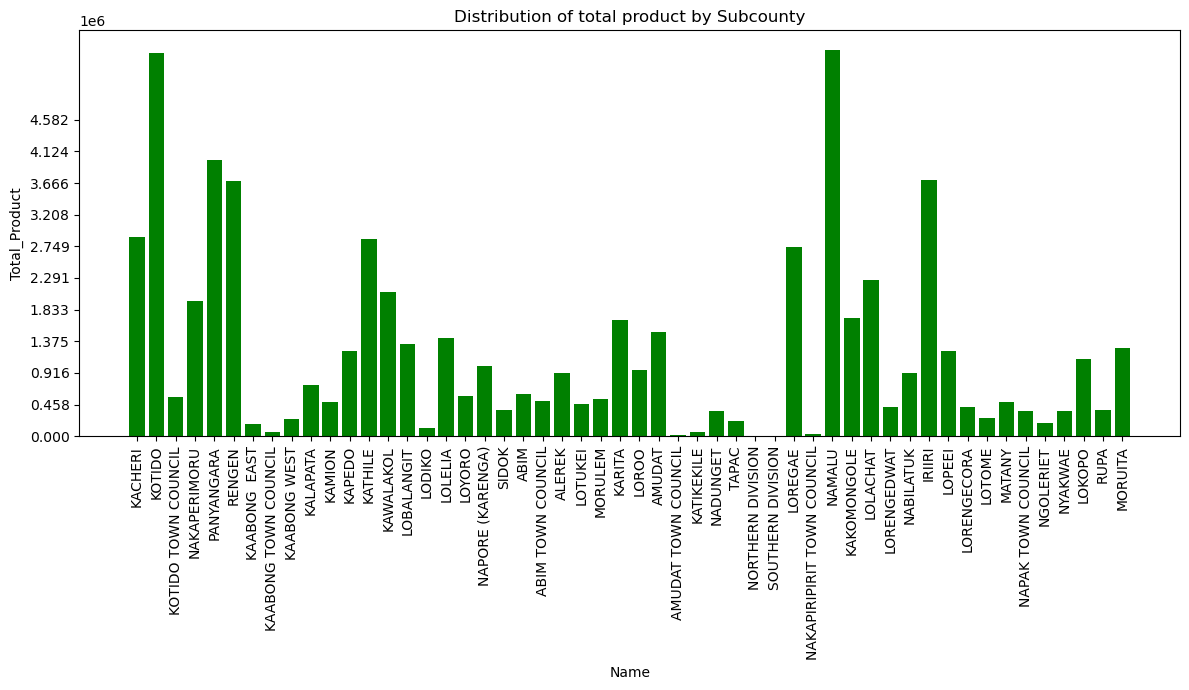

In [24]:
# create subplots and set the tight layout
fig, ax = plt.subplots(figsize=(12, 7))
fig.set_tight_layout(True)

# plot the bar graph, set the labels and the title
ax.bar(df['SUBCOUNTY_NAME'],df['Total_Prod'], color="green")
ax.set_xlabel("Name")
ax.set_ylabel("Total_Product")
ax.set_title("Distribution of total product by Subcounty")
plt.xticks(rotation='vertical')

# set the y ticks to start from the min value of df['S_Prod_Tot'] and stop at the max value of df['S_Prod_Tot']
yticks = np.linspace(start= df['S_Prod_Tot'].min(), stop = df['S_Prod_Tot'].max(), num=11)
ax.set_yticks(yticks);

In [25]:
# create a small dataframe and insert it to a variable name "subcounty_by_productivity"
subcounty_by_productivity = df[['SUBCOUNTY_NAME', 'Total_Prod']]
subcounty_by_productivity.head()


,SUBCOUNTY_NAME,Total_Prod
OBJECTID,,
0,KACHERI,2.879816e+06
1,KOTIDO,5.541496e+06
2,KOTIDO TOWN COUNCIL,5.714680e+05
3,NAKAPERIMORU,1.954668e+06
4,PANYANGARA,4.001549e+06


Next sort the values

In [26]:
# Sort the dataframe using the Total product values
# call the first five rows
subcounty_by_productivity_sorted = subcounty_by_productivity.sort_values(by=  'Total_Prod')
subcounty_by_productivity_sorted.head()

,SUBCOUNTY_NAME,Total_Prod
OBJECTID,,
33,SOUTHERN DIVISION,19.670000
32,NORTHERN DIVISION,63.504405
28,AMUDAT TOWN COUNCIL,10603.686199
35,NAKAPIRIPIRIT TOWN COUNCIL,35608.020760
7,KAABONG TOWN COUNCIL,55984.436430


In [27]:
# create a new variable 
# and declare the first five rows of the sorted subcounty productivity
top_5_least_productive = subcounty_by_productivity_sorted.head()

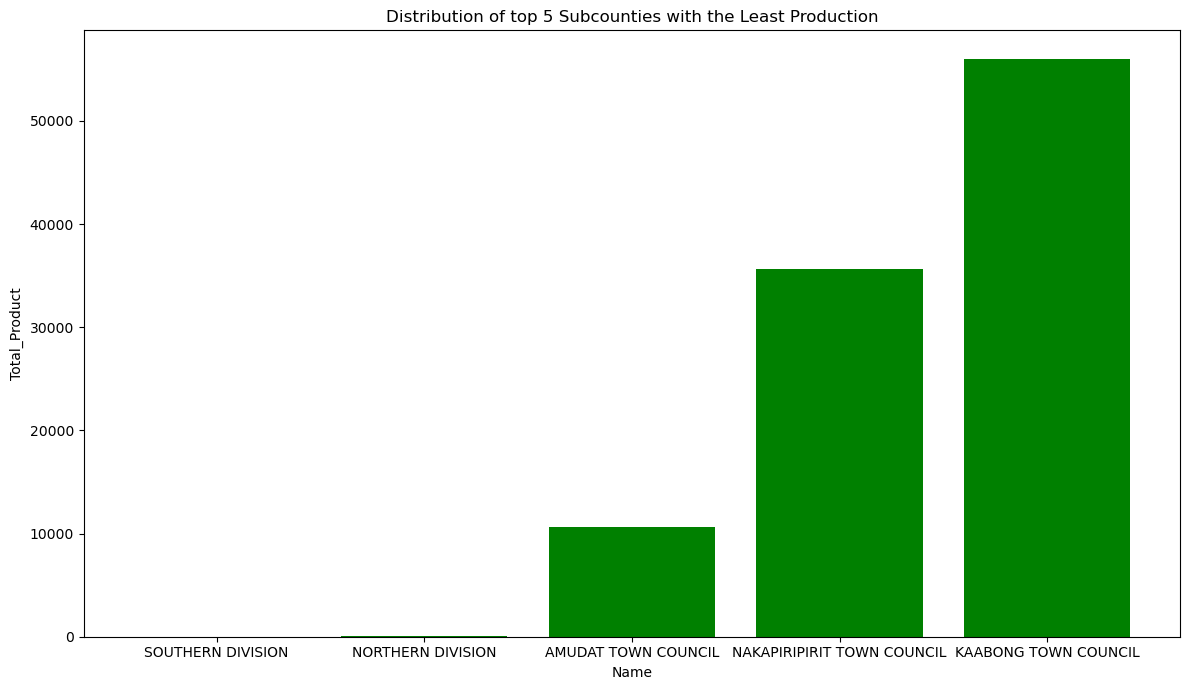

In [29]:
# create a new plot of the top 5 least productive subcounties
fig, ax = plt.subplots(figsize=(12, 7))
fig.set_tight_layout(True)

# plot the bar, set the labels and the title
ax.bar(top_5_least_productive['SUBCOUNTY_NAME'],top_5_least_productive['Total_Prod'], color="green")
ax.set_xlabel("Name")
ax.set_ylabel("Total_Product")
ax.set_title("Distribution of top 5 Subcounties with the Least Production");


### To find out if increase in crop area leads to increase in total Productivity
Does the crop area affect -:
- the total productivity

This question can be answered by getting the correlation between the Subcounty Area and the average yields for the two crops.

In [30]:
# call the first five rows
df.head()

,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Prod
OBJECTID,,,,,,,,,,,,,
0,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2279091.78,600723.892900,2.879816e+06
1,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4582294.49,959201.382500,5.541496e+06
2,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,561476.49,9991.488268,5.714680e+05
3,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1915695.93,38971.659080,1.954668e+06
4,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3779939.22,221609.511400,4.001549e+06


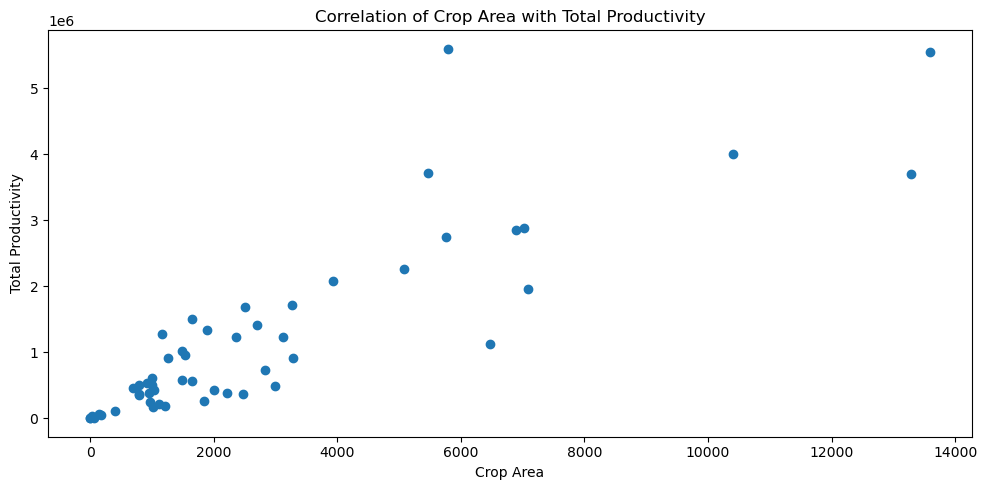

In [47]:
# create two subplots
# we create for two inorder to plot scatter plots for the two crops
# set the title and the lables for both plots
fig, ax = plt.subplots(figsize= (10,5))
ax.scatter(df['Crop_Area_Ha'],df['Total_Prod'])
ax.set_title("Correlation of Crop Area with Total Productivity")
ax.set_xlabel("Crop Area")
ax.set_ylabel("Total Productivity")

plt.tight_layout();

In [ ]:
"""
From the scatter plot above we can see that there is a clear trend.The data points increase going upwards from left to right.
From this we learn that there is a positive correlation between the Total Productivity and Crop Area

"""

### To find out the crop with the most yield

To find out the crop with the most yield first we create a dataframe with the S_Prod_Tot and M_Prod_Tot columns.
Then we get the sum of the two columns and print the crop with the most productivity.

In [28]:
# which is the crop with the most productivity
# S_Prod_Tot , M_Prod_Tot
crops_tot_prod = df[['S_Prod_Tot' , 'M_Prod_Tot']]
crops_tot_prod.head()

,S_Prod_Tot,M_Prod_Tot
OBJECTID,,
0,2.279092e+06,600723.892900
1,4.582294e+06,959201.382500
2,5.614765e+05,9991.488268
3,1.915696e+06,38971.659080
4,3.779939e+06,221609.511400


In [29]:
# print the sum of the Sorghum crop productivity
crops_tot_prod['S_Prod_Tot'].sum()

34098704.81067803

In [30]:
# print the sum of the Maize crop productivity
crops_tot_prod['M_Prod_Tot'].sum()

28603794.852811646

In [31]:
# print the crop with the most productivity
if crops_tot_prod['S_Prod_Tot'].sum() > crops_tot_prod['M_Prod_Tot'].sum():
    print("The crop with the most productivity is Sorghum with ", crops_tot_prod['S_Prod_Tot'].sum())
    
else:
    print("The crop with the most productivity is Maize with ", crops_tot_prod['M_Prod_Tot'].sum())

The crop with the most productivity is Sorghum with  34098704.81067803


### To find out the district with the most and least productivity
To get the district with the most productivity and least productivity we will use the district dataframe (df1). Then create a new column `Total_Prod`  with the sum of the crops productivity

In [32]:
# call the dataframe (df1)
df1

,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,,,,,,,,,,
0,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468
5,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
6,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


In [33]:
# use list comprehension to create a new columnn
df1['Total_Prod'] = [ x+y for x,y in zip(df1['S_Prod_Tot'], df1['M_Prod_Tot'])]

In [34]:
# check the new column
df1

,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Prod
OBJECTID,,,,,,,,,,,
0,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567,3394073
1,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558,4155110
2,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723,12719553
3,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575,18642479
4,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468,1029412
5,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197,14970688
6,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336,7799792


In [35]:
# Create a new dataframe with the name and total product columns
name_and_total_prod = df1[['NAME', 'Total_Prod']]
name_and_total_prod

,NAME,Total_Prod
OBJECTID,,
0,ABIM,3394073
1,AMUDAT,4155110
2,KAABONG,12719553
3,KOTIDO,18642479
4,MOROTO,1029412
5,NAKAPIRIPIRIT,14970688
6,NAPAK,7799792


In [36]:
# Sort the dataframe by the Total product in descending order
sorted_name_and_total_prod = name_and_total_prod.sort_values(by = 'Total_Prod', ascending = False)
sorted_name_and_total_prod

,NAME,Total_Prod
OBJECTID,,
3,KOTIDO,18642479
5,NAKAPIRIPIRIT,14970688
2,KAABONG,12719553
6,NAPAK,7799792
1,AMUDAT,4155110
0,ABIM,3394073
4,MOROTO,1029412


In [38]:
# print the the district with the most and least productivity
print("The district with the most production is ", sorted_name_and_total_prod['NAME'].loc[3],
      "with", sorted_name_and_total_prod['Total_Prod'].loc[3])
print("The district with the least production is ", sorted_name_and_total_prod['NAME'].loc[4],
      "with", sorted_name_and_total_prod['Total_Prod'].loc[4])

The district with the most production is  KOTIDO with 18642479
The district with the least production is  MOROTO with 1029412


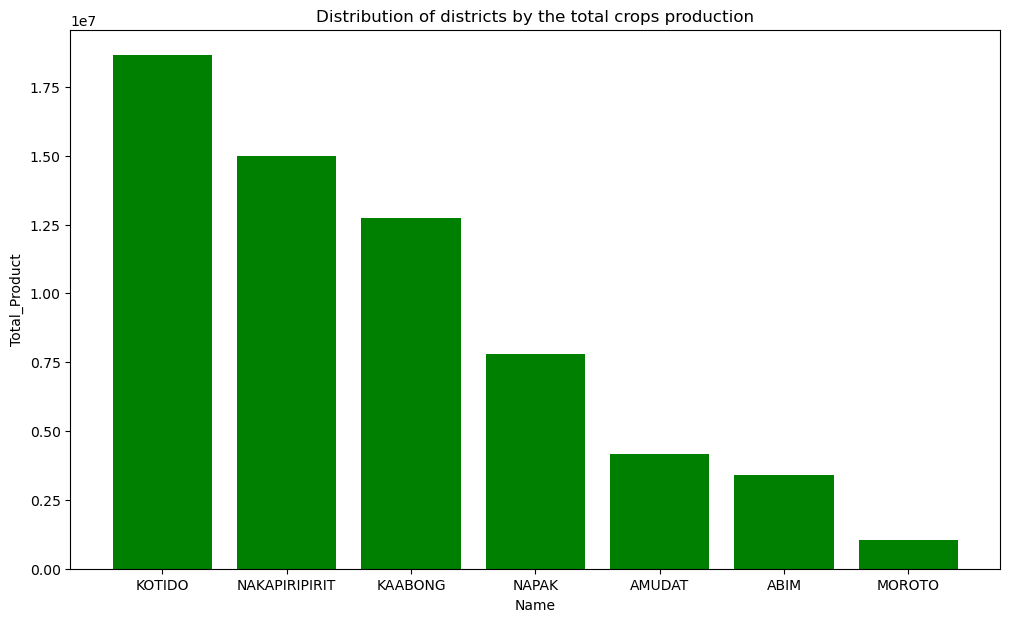

In [39]:
# create the subplot
fig, ax = plt.subplots(figsize=(12, 7))

#plot the distribution of districts by the total crops production
ax.bar(sorted_name_and_total_prod['NAME'],sorted_name_and_total_prod['Total_Prod'], color="green")
ax.set_xlabel("Name")
ax.set_ylabel("Total_Product")
ax.set_title("Distribution of districts by the total crops production");


To find out how Population Correlates with the Total Productivity of the crops
To find out the top 5 Subcounties with the least productivity
To find out if increase in crop area leads to increase in total Productivity
To find out the crop with the most yield
To find out the district with the most and least productivity

### Conclusion

This analysis aimed to find some information for the Dalberg Data Insights (DDI) to develop a new food security monitoring tool
to support the decision making of one of those NGOs active in Karamoja.
The findings were as follows-:
- Population has a positive correlation with the Crops productivity as the population increases as the crop productivity increases
- The top five subcounties in Karamoja with the least productivity are :
    - `SOUTHERN DIVISION`
    -  `NORTHERN DIVISION`
    - `AMUDAT TOWN COUNCIL`
    - `NAKAPIRIPIRIT TOWN COUNCIL`
    - `KAABONG TOWN COUNCIL`	
- Also it is noted that as the Crop Area increases this leads to increase in the crop productivity.
- The crop with the most productivity is `Sorghum`
- The district with the most production is  `KOTIDO` with 18642479 and the district with the least production is  `MOROTO` with 1029412

### Recommendations
- When making decisions to improve food-insecurity the NGOs should consider prioiritizing the above listed subcounties since they have the least yields.
- Also the NGOs should encourage and provide materials for growing Sorghum since it is highly productive in Karamoja.
- Also they should consider Moroto district since it has very low crop productivity compared to the other districts.
- If possible they could help the people in Karamoja in maintaining land and also increasing the land since the crop area has a positive correlation with crop productivity

Click on this [link](https://public.tableau.com/app/profile/michelle.murigi/viz/learn-dvp-proj2/Dashboard1?publish=yes) to get a tableau dashboard presentation.

Click on this [link](https://1drv.ms/p/c/7b54cccbf5f8cdab/EWJHDqtRZYFKmGHKGijtNeQBWQwKVu_orM16nefTjp8fIQ) to get a powerpoint presentation